In [1]:
"""
This is the unit test module for spectrafit.py
"""

import pickle
import numpy as np
import pandas as pd
import lmfit
import os
from ramandecompy import spectrafit


data_filename = '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx'
DATA = pd.read_excel(data_filename, header=None, names=('x', 'y'))
X_TEST = DATA['x'].values
Y_TEST = DATA['y'].values

In [2]:
# get automatic calibration fit data
import h5py
from ramandecompy import dataprep

# dataprep.new_hdf5('test_writing')
# dataprep.add_calibration('test_writing.hdf5',
#                          'ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx',
#                          'hydrogen')

In [3]:
hydrogen = h5py.File('test_writing.hdf5', 'r')

In [4]:
list(hydrogen['hydrogen'].keys())

['Peak_01',
 'Peak_02',
 'Peak_03',
 'Peak_04',
 'counts',
 'residuals',
 'wavenumber']

In [5]:
peak1 = list(hydrogen['hydrogen/Peak_01'])
peak2 = list(hydrogen['hydrogen/Peak_02'])
peak3 = list(hydrogen['hydrogen/Peak_03'])
peak4 = list(hydrogen['hydrogen/Peak_04'])

In [6]:
peak4

[(0.91026426, 4.39010113, 1035.65477477, 3393.78273415, 8.78020227, 256.57385316, 3386.98656078)]

In [7]:
def test_build_custom_model():
    """
    docstring
    """
    # first build a custom peak list that only contains the pseudo voight descriptors for the first 3 peaks
    peaks =[(0.68764166, 4.52683284, 355.65041041, 8506.9345801, 9.05366569, 687.05133171, 8424.94459088),
            (0.57765067, 4.40443189, 587.33331331, 21649.13312358, 8.80886378, 1878.91168914, 21593.07349362),
            (0.65921506, 4.44539185, 816.00734735, 3733.9967507, 8.8907837, 310.71145822, 3726.8698975)]
    # not the "speculated" center and height location of the 4th peak
    peaks_add = [(1035, 256)]
    fit_result, residuals = spectrafit.build_custom_model(X_TEST, Y_TEST, peaks, peaks_add, plot_fits=True)
    assert len(fit_result) == 4, '4th peak was not successfully added to the model'
    assert isinstance(fit_result, list), '`fit_result` is not a list'
    for i, element in enumerate(fit_result):
        assert isinstance(element, list), 'element with index {} in fit_result is not a list'.format(i)
        if i <= 2:
            assert len(element) == 7, 'index {} in fit_result should have length 7'.format(i)
        else:
            assert len(element) == 8, 'index {} in fit_result should have length 8'.format(i)
            assert element[-1] == 'user_added', 'user_added tag not successfully appended' 
    assert len(residuals) == len(X_TEST), 'size of `residuals` does not match input data'
    assert isinstance(residuals[0], np.float64), 'the 1st element in `residuals` is not a np.float64'
    try:
        spectrafit.build_custom_model(4.2, Y_TEST, peaks, peaks_add, plot_fits=True)
    except TypeError:
            print('A float was passed to the function, and was handled well with a TypeError.')
    try:
        spectrafit.build_custom_model(X_TEST, 'Y_TEST', peaks, peaks_add, plot_fits=True)
    except TypeError:
            print('A string was passed to the function, and was handled well with a TypeError.')
    try:
        spectrafit.build_custom_model(X_TEST, Y_TEST, (1, 2, 3, 4, 5, 6), peaks_add, plot_fits=True)
    except TypeError:
            print('A tuple was passed to the function, and was handled well with a TypeError.')
    try:
        spectrafit.build_custom_model(X_TEST, Y_TEST, peaks, 4.2, plot_fits=1)
    except TypeError:
            print('A float was passed to the function, and it was handled well with a TypeError.')
    try:
        spectrafit.build_custom_model(X_TEST, Y_TEST, peaks, peaks_add, plot_fits=1)
    except TypeError:
            print('An int was passed to the function, and was handled well with a TypeError.')

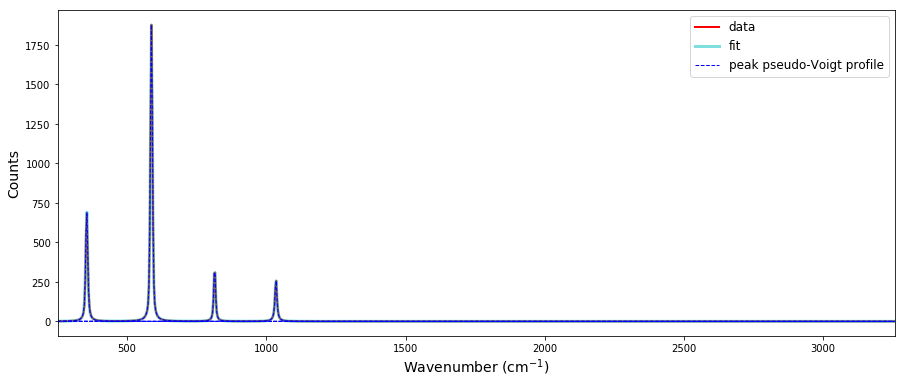

A float was passed to the function, and was handled well with a TypeError.
A string was passed to the function, and was handled well with a TypeError.
A tuple was passed to the function, and was handled well with a TypeError.
A float was passed to the function, and it was handled well with a TypeError.
An int was passed to the function, and was handled well with a TypeError.


In [8]:
test_build_custom_model()

In [9]:
def test_apply_old_model():
    """
    docstring
    """
    # first build a custom peak list that only contains the pseudo voight descriptors for each peak with
    # slightly lower initial amplitudes
    peaks =[(0.68764166, 4.52683284, 355.65041041, 8000, 9.05366569, 687.05133171, 8424.94459088),
            (0.57765067, 4.40443189, 587.33331331, 18000, 8.80886378, 1878.91168914, 21593.07349362),
            (0.65921506, 4.44539185, 816.00734735, 3000, 8.8907837, 310.71145822, 3726.8698975),
            (0.91026426, 4.39010113, 1035.65477477, 2500, 8.78020227, 256.57385316, 3386.98656078)]
    fit_result, residuals = spectrafit.apply_old_model(X_TEST, Y_TEST, peaks, plot_fits=True)
    assert len(fit_result) == 4, '4th peak was not successfully added to the model'
    assert isinstance(fit_result, list), '`fit_result` is not a list'
    for i, element in enumerate(fit_result):
        assert isinstance(element, list), 'element with index {} in fit_result is not a list'.format(i)
        assert len(element) == 7, 'index {} in fit_result should have length 7'.format(i)
    assert len(residuals) == len(X_TEST), 'size of `residuals` does not match input data'
    assert isinstance(residuals[0], np.float64), 'the 1st element in `residuals` is not a np.float64'
    try:
        spectrafit.apply_old_model(4.2, Y_TEST, peaks, plot_fits=True)
    except TypeError:
            print('A float was passed to the function, and was handled well with a TypeError.')
    try:
        spectrafit.apply_old_model(X_TEST, 'Y_TEST', peaks, plot_fits=True)
    except TypeError:
            print('A string was passed to the function, and was handled well with a TypeError.')
    try:
        spectrafit.apply_old_model(X_TEST, Y_TEST, (1, 2, 3, 4, 5, 6), plot_fits=True)
    except TypeError:
            print('A tuple was passed to the function, and was handled well with a TypeError.')
    try:
        spectrafit.apply_old_model(X_TEST, Y_TEST, peaks, plot_fits=1)
    except TypeError:
            print('An int was passed to the function, and was handled well with a TypeError.')

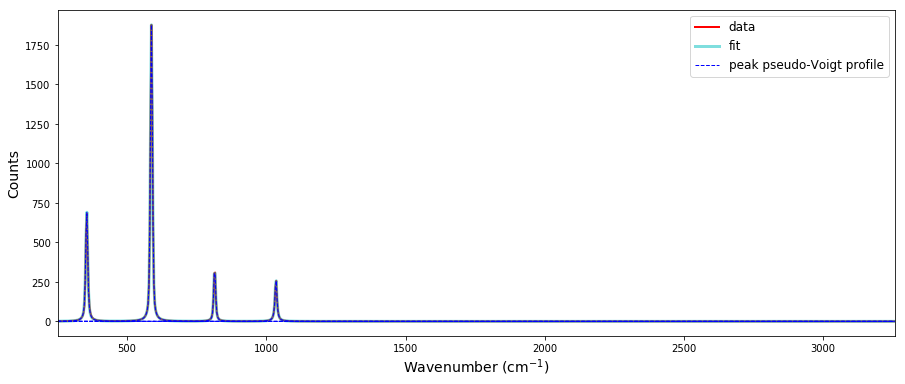

A float was passed to the function, and was handled well with a TypeError.
A string was passed to the function, and was handled well with a TypeError.
A tuple was passed to the function, and was handled well with a TypeError.
An int was passed to the function, and was handled well with a TypeError.


In [10]:
test_apply_old_model()

### find a way to copy existing hdf5 files and give them a new name for testing

In [11]:
from shutil import copyfile
from ramandecompy import dataprep

In [12]:
copyfile('ramandecompy/tests/test_files/test_experiment.hdf5', 'copy.hdf5')

'copy.hdf5'

In [13]:
dataprep.view_hdf5('copy.hdf5')

**** copy.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09*
|    |    Peak_10*
|    |    Peak_11*
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|

In [14]:
import os
import h5py
from shutil import copyfile

def test_superimpose_next():
    """
    docstring
    """
    # initialize inputs
    hdf5_filename = 'test_experiement_copy.hdf5'
    existing_key = '300C/25s'
    new_key = '300C/35s'
    # create a copy of test_experiment.hdf5
    copyfile('ramandecompy/tests/test_files/test_experiment.hdf5', hdf5_filename)
    # run function
    spectrafit.superimpose_next(hdf5_filename, existing_key, new_key, plot_fits=True)
    try:
        spectrafit.superimpose_next(4.2, existing_key, new_key, plot_fits=True)
    except TypeError:
        print('A float was passed to the function, and was handled well with a TypeError.')
    try:
        spectrafit.superimpose_next(hdf5_filename, [1, 2], new_key, plot_fits=True)
    except TypeError:
        print('A list was passed to the function, and was handled well with a TypeError.')
    try:
        spectrafit.superimpose_next(hdf5_filename, existing_key, 4, plot_fits=True)
    except TypeError:
        print('An int was passed to the function, and was handled well with a TypeError.')
    try:
        spectrafit.superimpose_next(hdf5_filename, existing_key, new_key, plot_fits='yes')
    except TypeError:
        print('A string was passed to the function, and was handled well with a TypeError.')
    os.remove(hdf5_filename)

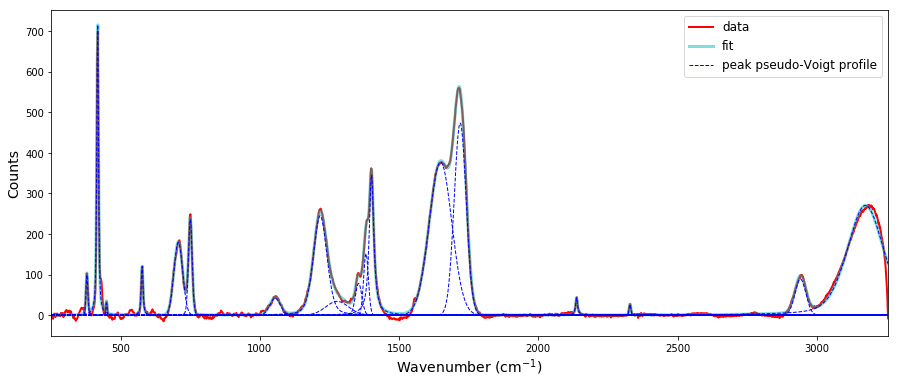

A float was passed to the function, and was handled well with a TypeError.
A list was passed to the function, and was handled well with a TypeError.
An int was passed to the function, and was handled well with a TypeError.
A string was passed to the function, and was handled well with a TypeError.


In [15]:
test_superimpose_next()

In [16]:
test = ['blah', 'blah2', 'blah4']
if not'blah3' in test:
    raise TypeError

TypeError: 

In [18]:
def test_superimpose_set():
    """
    docstring
    """
    # initialize inputs
    hdf5_filename = 'test_experiement_copy.hdf5'
    target_key = '300C/25s'
    # create a copy of test_experiment.hdf5
    copyfile('ramandecompy/tests/test_files/test_experiment.hdf5', hdf5_filename)
    # run function
    spectrafit.superimpose_set(hdf5_filename, target_key, plot_fits=True)
    try:
        spectrafit.superimpose_set(4.2, target_key, plot_fits=True)
    except TypeError:
        print('A float was passed to the function, and was handled well with a TypeError.')
    try:
        spectrafit.superimpose_set(hdf5_filename, 7, plot_fits=True)
    except TypeError:
        print('An int was passed to the function, and was handled well with a TypeError.')
    try:
        spectrafit.superimpose_set(hdf5_filename, '420C/25s', plot_fits=True)
    except KeyError:
        print('An invalid key was passed to the function, and was handled well with a KeyError.')
    try:
        spectrafit.superimpose_set(hdf5_filename, target_key, plot_fits=(1, 'foo'))
    except TypeError:
        print('A tuple was passed to the function, and was handled well with a TypeError.')
    os.remove(hdf5_filename)

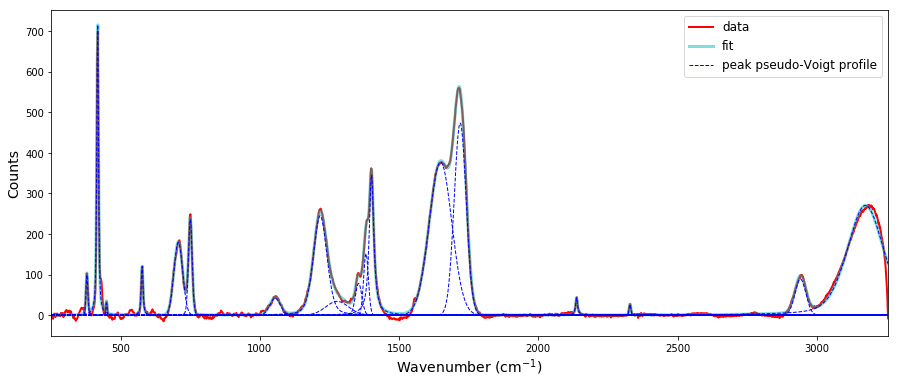

Existing fit for 300C/25s superimposed and refit for 300C/35s


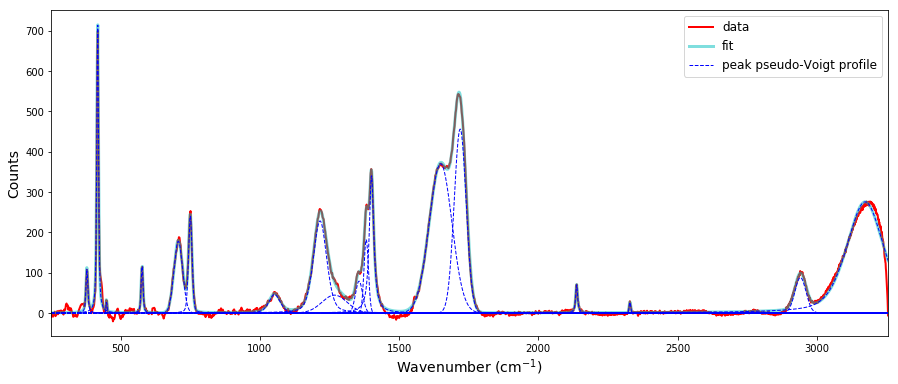

Existing fit for 300C/35s superimposed and refit for 300C/45s


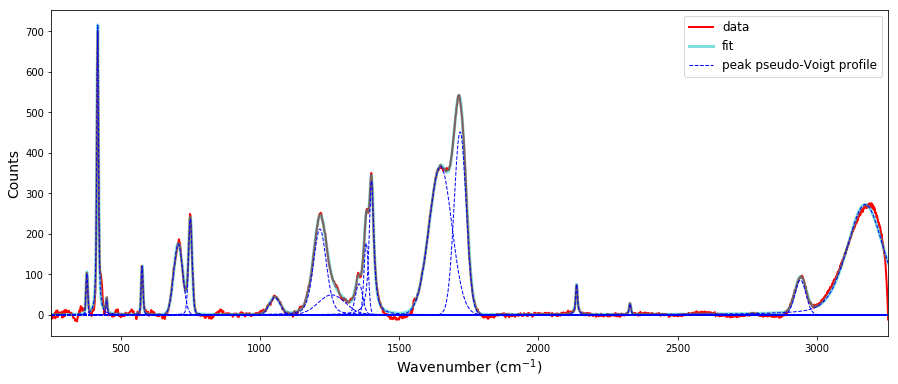

Existing fit for 300C/45s superimposed and refit for 300C/55s


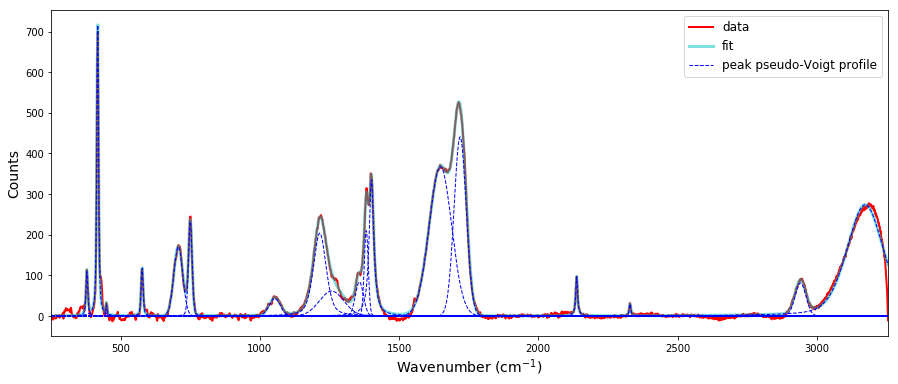

Existing fit for 300C/55s superimposed and refit for 300C/65s
A float was passed to the function, and was handled well with a TypeError.
An int was passed to the function, and was handled well with a TypeError.
An invalid key was passed to the function, and was handled well with a KeyError.
A tuple was passed to the function, and was handled well with a TypeError.


In [19]:
test_superimpose_set()

In [ ]:
hdf5_filename = 'test_experiement_copy.hdf5'
target_key = '300C/25s'
# create a copy of test_experiment.hdf5
copyfile('ramandecompy/tests/test_files/test_experiment.hdf5', hdf5_filename)

In [ ]:
hdf5 = h5py.File(hdf5_filename, 'r')

In [ ]:
target_key = '420C/25s'
if target_key in list(hdf5.keys()) == False:
    raise KeyError("""Passed value of `target_key` is not
    a valid key for {}""".format(hdf5_filename))